# Request vercel API
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Import library

In [1]:
from github import Github
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Bước 1: Chọn repo trên Github

### Kết nối tới repo

In [2]:
g = Github("")
repo_owner = 'vercel'
repo_name = 'vercel'

### Lấy thông tin repo

In [3]:
repo = g.get_repo(f"{repo_owner}/{repo_name}")

## Bước 2: Thu thập dữ liệu

##### Lấy danh sách commits

In [4]:
prs = repo.get_commits()

### Tạo danh sách lưu chữ thông tin về commits

In [5]:
commit_data = []

for pr in prs:
    print(pr.last_modified_datetime)
    commit_info = {
        "sha": pr.sha,
        "author": pr.commit.author.name,
        "author_date": pr.commit.author.date,
        "committer": pr.commit.committer.name,
        "committer_date": pr.commit.committer.date,
        "message": pr.commit.message,
    }
    commit_data.append(commit_info)

2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-06-12 17:45:25+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 02:45:03+00:00
2024-05-23 0

## Bước 3: Làm sạch vè tiền xử lý dữ liệu

### Chuyển đổi danh sách thành DataFrame

In [6]:
df_commits = pd.DataFrame(commit_data)
df_commits.to_csv("commits_data.csv", index=False)

print(df_commits.head())

                                        sha              author  \
0  545f1174879e51cc8116125d87e430cde67210ee  Vercel Release Bot   
1  84b744541b58524bd91e3b3f0628b675e772660f           JJ Kasper   
2  9d6088e0b55578d776ac95a038a9c00f8eb22030  Vercel Release Bot   
3  c925dc4a1bf3a47b684b5f7fd788ddd24ba1ed1e       Dima Voytenko   
4  21444a38e50ed680c91b0e3955f15e378eeda64b      Austin Merrick   

                author_date committer            committer_date  \
0 2024-06-12 17:45:25+00:00    GitHub 2024-06-12 17:45:25+00:00   
1 2024-06-11 21:21:41+00:00    GitHub 2024-06-11 21:21:41+00:00   
2 2024-06-07 15:40:38+00:00    GitHub 2024-06-07 15:40:38+00:00   
3 2024-06-06 23:45:45+00:00    GitHub 2024-06-06 23:45:45+00:00   
4 2024-06-06 23:20:23+00:00    GitHub 2024-06-06 23:20:23+00:00   

                                             message  
0  Version Packages (#11720)\n\nThis PR was opene...  
1  [next] Ensure all prerenders have matching .ac...  
2  Version Packages (#11693)\

### Làm sạch dữ liệu

##### Kiểm tra thông tin còn thiếu

In [7]:
print(df_commits.isnull().sum())

sha               0
author            0
author_date       0
committer         0
committer_date    0
message           0
dtype: int64


##### Xử lý dữ liệu thiếu

In [8]:
df_commits = df_commits.dropna()

##### Kiểm tra lại dữ liệu

In [9]:
print(df_commits.isnull().sum())

sha               0
author            0
author_date       0
committer         0
committer_date    0
message           0
dtype: int64


##### Kiểm tra dữ liệu trùng lặp

In [10]:
print(df_commits.duplicated().sum())

0


##### Loại bỏ các hàng trùng lặp

In [11]:
df_commits = df_commits.drop_duplicates()

##### Kiểm tra và lưu lại dữ liệu sau khi làm sạch

In [12]:
print(df_commits.duplicated().sum())

df_commits.to_csv("commits_data_cleaned.csv", index=False)

0


### Tiền xử lý dữ liệu

#### Lọc dữ liệu để chỉ bao gồm commits trong năm 2023

In [13]:
df_2023 = pd.DataFrame(df_commits[df_commits['author_date'].dt.year == 2023])

print(df_2023.head())

                                          sha         author  \
333  9903f11cc3a4face9e4690d8b40af966ea84c3d1      Luc Leray   
334  04f5f3f3d2f14399124d8bc1cc3b4e34c73b05f6      Luc Leray   
335  5e3c077b6b99166f4d7f3652b4d7581f9ee7d3d5  Trek Glowacki   
336  2cc2fac8195790969cd31ff09ebc32cd6df15144  Trek Glowacki   
337  c536a74bc9e7188a87b292615fa88d6fc506b105     Seiya Nuta   

                  author_date committer            committer_date  \
333 2023-12-21 19:21:53+00:00    GitHub 2023-12-21 19:21:53+00:00   
334 2023-12-21 19:04:26+00:00    GitHub 2023-12-21 19:04:26+00:00   
335 2023-12-21 17:01:52+00:00    GitHub 2023-12-21 17:01:52+00:00   
336 2023-12-21 16:17:38+00:00    GitHub 2023-12-21 16:17:38+00:00   
337 2023-12-21 10:11:34+00:00    GitHub 2023-12-21 10:11:34+00:00   

                                               message  
333  [examples] Fix `ERR_PNPM_OUTDATED_LOCKFILE` wh...  
334  [examples] Fix TypeScript error in ionic react...  
335  [static-build] update io

##### Chuyển đổi cột 'author_date' và 'committer_date' thành định dạng datetime

In [14]:
df_2023['author_date'] = pd.to_datetime(df_2023['author_date'])
df_2023['committer_date'] = pd.to_datetime(df_2023['committer_date'])

print(df_2023.dtypes)

sha                            object
author                         object
author_date       datetime64[ns, UTC]
committer                      object
committer_date    datetime64[ns, UTC]
message                        object
dtype: object


##### Thêm cột 'year', 'month' để phân tích theo thời gian

In [15]:
df_2023['year'] = df_2023['author_date'].dt.year
df_2023['month'] = df_2023['author_date'].dt.month


##### Lưu trữ lại DataFrame sau khi tiền xử lý

In [16]:
df_2023.to_csv("commits_data_preprocessed.csv", index=False)
print(df_2023.head())

                                          sha         author  \
333  9903f11cc3a4face9e4690d8b40af966ea84c3d1      Luc Leray   
334  04f5f3f3d2f14399124d8bc1cc3b4e34c73b05f6      Luc Leray   
335  5e3c077b6b99166f4d7f3652b4d7581f9ee7d3d5  Trek Glowacki   
336  2cc2fac8195790969cd31ff09ebc32cd6df15144  Trek Glowacki   
337  c536a74bc9e7188a87b292615fa88d6fc506b105     Seiya Nuta   

                  author_date committer            committer_date  \
333 2023-12-21 19:21:53+00:00    GitHub 2023-12-21 19:21:53+00:00   
334 2023-12-21 19:04:26+00:00    GitHub 2023-12-21 19:04:26+00:00   
335 2023-12-21 17:01:52+00:00    GitHub 2023-12-21 17:01:52+00:00   
336 2023-12-21 16:17:38+00:00    GitHub 2023-12-21 16:17:38+00:00   
337 2023-12-21 10:11:34+00:00    GitHub 2023-12-21 10:11:34+00:00   

                                               message  year  month  
333  [examples] Fix `ERR_PNPM_OUTDATED_LOCKFILE` wh...  2023     12  
334  [examples] Fix TypeScript error in ionic react...  2023

## Bước 4 & 5: Phân tích và trực quan hoá dữ liệu

### 1. Phân tích số lượng commits theo tháng trong năm 2023

##### Xác định số lượng commits theo tháng

In [17]:
commits_per_month_2023 = df_2023.groupby(df_2023['author_date'].dt.month).size()
print(commits_per_month_2023)

author_date
1     135
2     131
3      90
4      70
5      97
6      65
7      55
8      96
9      96
10     84
11     39
12     47
dtype: int64


##### Trực quan hóa số lượng commits theo tháng trong năm 2023

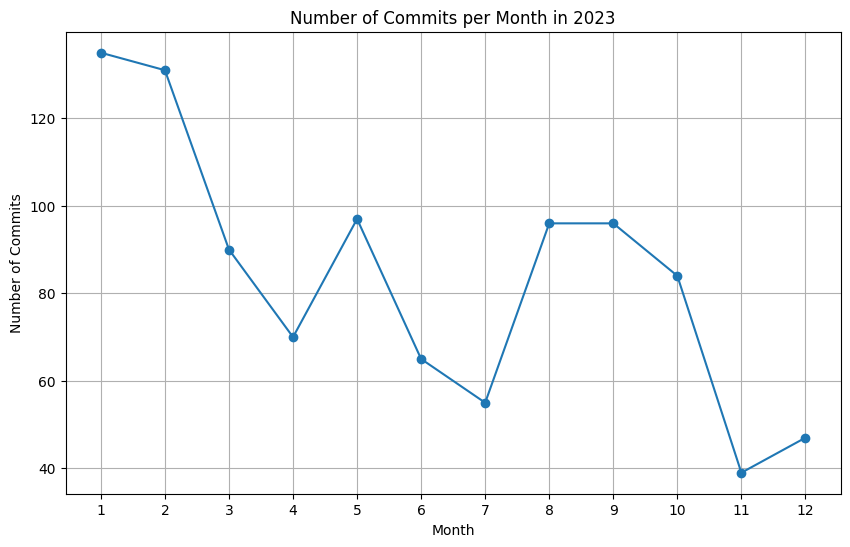

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(commits_per_month_2023.index, commits_per_month_2023.values, marker='o')
plt.title('Number of Commits per Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(commits_per_month_2023.index)
plt.grid(True)
plt.show()
plt.close()

### 2. Phân tích số lượng commits theo ngày trong tuần trong năm 2023

##### Tạo cột 'day_of_week' để lưu thông tin ngày trong tuần (0: Monday, 6: Sunday)

In [19]:
df_2023['day_of_week'] = df_2023['author_date'].dt.dayofweek

##### Tính số lượng commits và đặt tên cho các ngày trong tuần

In [20]:
commits_per_day_of_week = df_2023['day_of_week'].value_counts().sort_index()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
commits_per_day_of_week.index = day_names

##### Vẽ biểu đồ số lượng commits theo ngày trong tuần

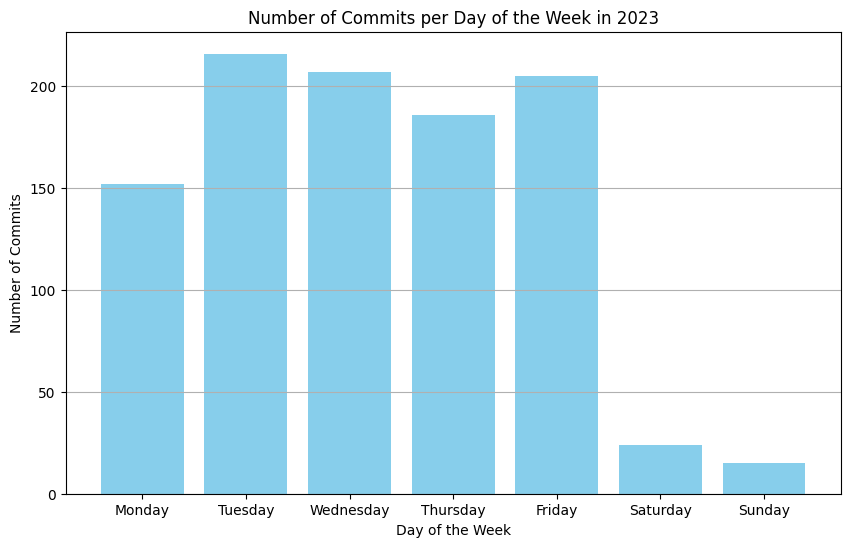

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(commits_per_day_of_week.index, commits_per_day_of_week.values, color='skyblue')
plt.title('Number of Commits per Day of the Week in 2023')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Commits')
plt.grid(axis='y')
plt.show()
plt.close()

### 3. Phân tích số lượng commits theo giờ trong ngày trong năm 2023

##### Tạo cột 'hour_of_day' để lưu thông tin giờ trong ngày (0-23)

In [22]:
df_2023['hour_of_day'] = df_2023['author_date'].dt.hour

##### Tính số lượng commits cho mỗi giờ trong ngày

In [23]:
commits_per_hour = df_2023['hour_of_day'].value_counts().sort_index()

##### Vẽ biểu đồ số lượng commits theo giờ trong ngày

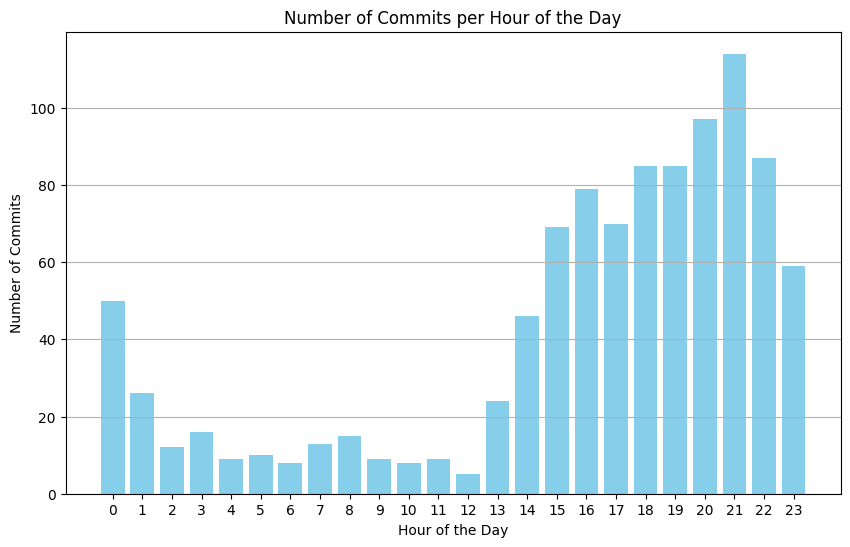

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(commits_per_hour.index, commits_per_hour.values, color='skyblue')
plt.title('Number of Commits per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Commits')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()
plt.close()

### 4. Phân tích tần suất commits của các tác giả trong năm 2023

##### Xác định tần suất commits của các tác giả trong năm 2023

In [25]:
commits_per_author_2023 = df_2023['author'].value_counts()
print(commits_per_author_2023.head(10))

author
Nathan Rajlich        212
Vercel Release Bot    134
Steven                103
Sean Massa             98
Trek Glowacki          84
Ethan Arrowood         80
Chris Barber           67
JJ Kasper              44
Kiko Beats             20
Zack Tanner            15
Name: count, dtype: int64


##### Trực quan hóa tần suất commits của các tác giả trong năm 2023

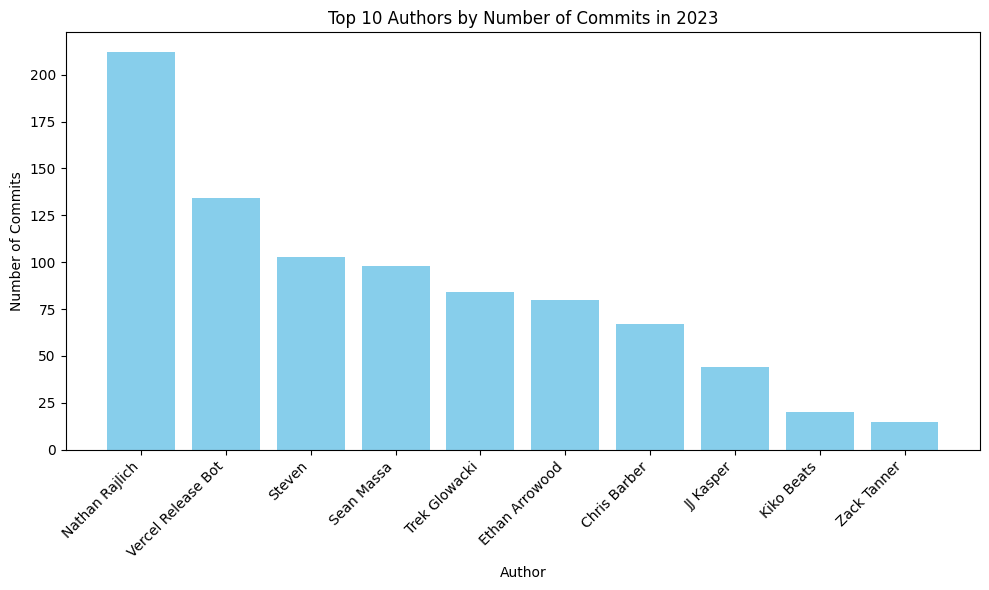

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(commits_per_author_2023.index[:10], commits_per_author_2023.values[:10], color='skyblue')
plt.title('Top 10 Authors by Number of Commits in 2023')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

### 5. Phân tích tầng suất các từ khoá quan trọng

##### Tạo một danh sách các từ khóa quan trọng cần phân tích

In [27]:
keywords = ["fix", "add", "update", "remove", "rename", "refactor", "test", "merge", "release", "build"]

##### Đếm tần suất các từ khóa trong commit message

In [28]:
def count_keywords(message, keywords):
    message = message.lower()
    return {keyword: message.count(keyword) for keyword in keywords}

df_2023['keyword_counts'] = df_2023['message'].apply(lambda x: count_keywords(x, keywords))

##### Tổng hợp tần suất các từ khóa

In [29]:
keyword_totals = Counter()
for counts in df_2023['keyword_counts']:
    keyword_totals.update(counts)

##### Trực quan hóa tần suất các từ khóa

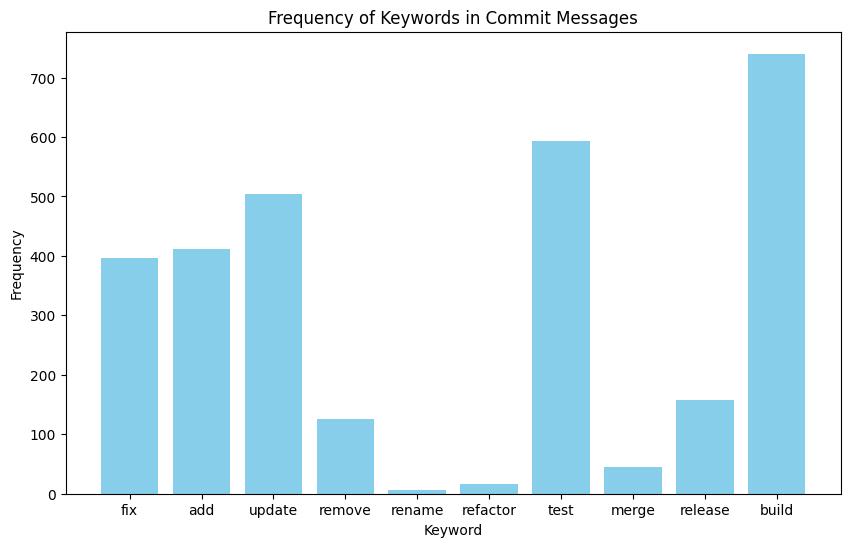

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(keyword_totals.keys(), keyword_totals.values(), color='skyblue')
plt.title('Frequency of Keywords in Commit Messages')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()
plt.close()


### 6. Phần tích độ dài của các message

##### Tính độ dài của mỗi commit message và độ dài trung bình

In [31]:
df_2023['message_length'] = df_2023['message'].apply(len)

average_length = df_2023['message_length'].mean()
print(f"Average commit message length: {average_length:.2f} characters")

Average commit message length: 347.61 characters


##### Trực quan hóa phân phối độ dài của commit message

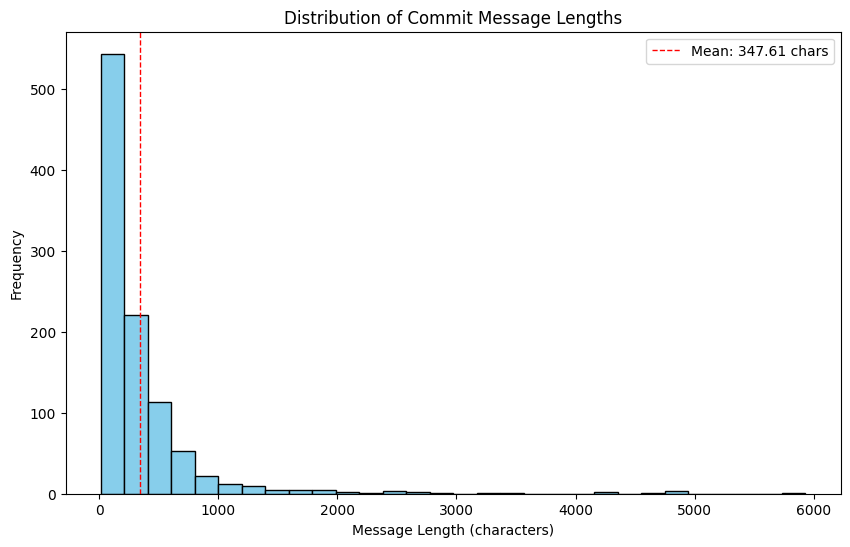

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_2023['message_length'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {average_length:.2f} chars')
plt.title('Distribution of Commit Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.close()


### 7. Phân tích xu hướng nội dung commit theo tháng

##### Chuyển cột 'author_date' sang chỉ chứa tháng và năm

In [33]:
df_2023['month_year'] = df_2023['author_date'].dt.strftime('%Y-%m')

##### Tính tần suất từ khóa theo tháng

In [34]:
keyword_trends = {keyword: [] for keyword in keywords}
dates = sorted(df_2023['month_year'].unique())

for date in dates:
    df_month = df_2023[df_2023['month_year'] == date]
    monthly_counts = Counter()
    for counts in df_month['keyword_counts']:
        monthly_counts.update(counts)
    for keyword in keywords:
        keyword_trends[keyword].append(monthly_counts[keyword])

##### Trực quan hóa xu hướng từ khóa theo tháng

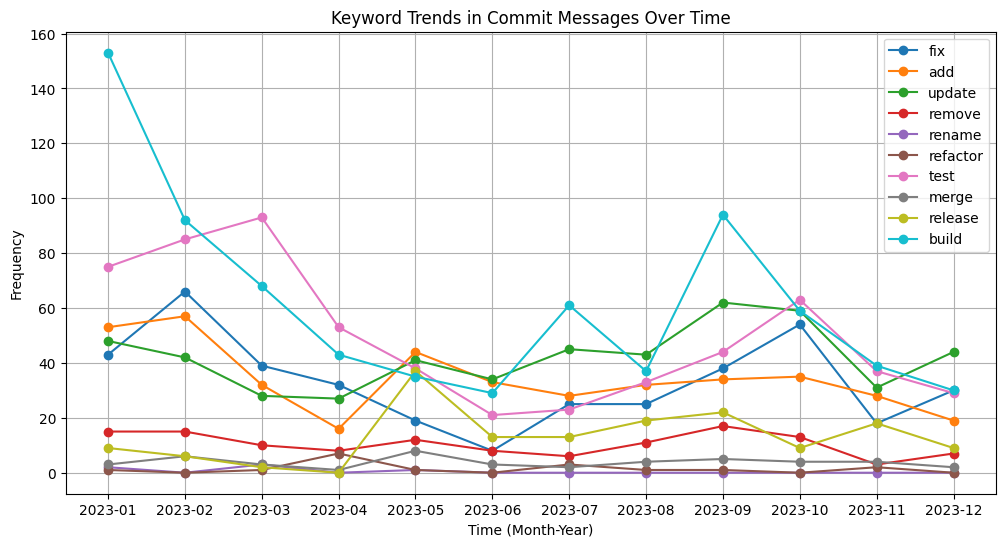

In [35]:
plt.figure(figsize=(12, 6))
for keyword in keywords:
    plt.plot(dates, keyword_trends[keyword], marker='o', label=keyword)

plt.title('Keyword Trends in Commit Messages Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
plt.close()
